In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
def string_to_seconds(x):
    x = x.split(":")
    return dt.timedelta(hours=int(x[0]), minutes=int(x[1]), seconds=int(x[2])).total_seconds()

In [3]:
fortran = ["01:27:51", "00:45:16", "00:24:08", "00:17:52", "00:13:55", "00:11:52"]
fortran = np.array([string_to_seconds(i) for i in fortran])

python = ["1:35:36", "0:55:52", "0:36:48", "0:32:47", "0:28:11", "0:27:57"]
python = np.array([string_to_seconds(i) for i in python])

cores = np.array([1, 2, 4, 6, 8, 10])

fortran_benchmark = np.append(fortran[0], (fortran[:-1] * (cores[:-1] / cores[1:])))
python_benchmark = np.append(python[0], (python[:-1] * (cores[:-1] / cores[1:])))

In [4]:
def format_time(x, pos=None):
    return str(dt.timedelta(seconds=int(x)))

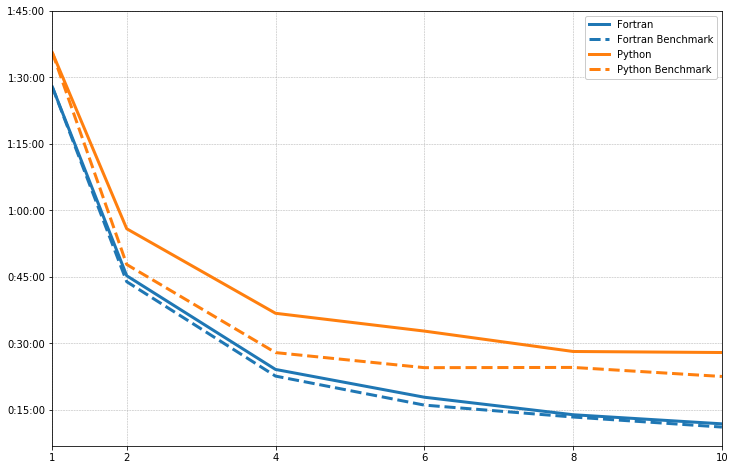

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(cores, fortran, label="Fortran")
ax.plot(cores, fortran_benchmark, c="C0", label="Fortran Benchmark", ls="--")

ax.plot(cores, python, label="Python")
ax.plot(cores, python_benchmark, c="C1", label="Python Benchmark", ls="--")

ax.set_xticks([1, 2, 4, 6, 8, 10])
ax.set_yticks([i * 900 for i in range(1, 8)])

ax.set_xlim(1, 10)
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(format_time))

ax.grid(True, which="major", axis="both", ls="--", lw=0.5)
ax.legend()

plt.savefig("fig-scalability.png")
plt.show()
plt.close()